# SVM classification EXAMPLE cvxpy

In [111]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [85]:
iris = datasets.load_iris()

In [166]:
y = np.where(iris.target[iris.target < 2] == 1, 1, -1).reshape((100,1))
X = iris.data[:y.shape[0], :]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)


$f(\beta, v) = (1/m) \sum_i (1 - y_i(\beta^Tx_i - v))_+ + \lambda ||\beta||_1$

In [160]:
beta = cp.Variable((X_train.shape[1],1))
v = cp.Variable()
loss = cp.sum(cp.pos(1 - cp.multiply(y_train, X_train @ beta - v)))
reg = cp.norm(beta, 1)
lambd = cp.Parameter(nonneg=True)
prob = cp.Problem(cp.Minimize(loss/m + lambd*reg))

In [162]:
TRIALS = 100
train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error[i] = (y_train != np.sign(X_train.dot(beta.value) - v.value)).sum()/m
    test_error[i] = (y_test != np.sign(X_test.dot(beta.value) - v.value)).sum()/TEST
    beta_vals.append(beta.value)

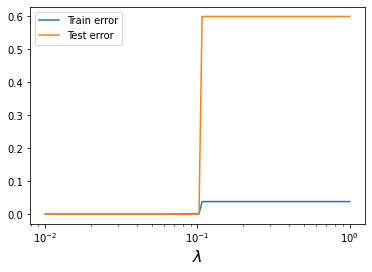

In [163]:
plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

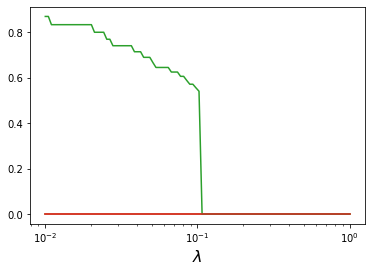

In [184]:
for i in range(4):
    plt.plot(lambda_vals, [wi[i,0] for wi in beta_vals])
plt.xlabel(r"$\lambda$", fontsize=16)
plt.xscale("log")